# Exploratory data analysis

EDA of dataframe created by handling missing values from the original dataset

Importing modules and loading datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/processed/nonait.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0


## Univariate analysis

### Distribution of the target variable (TenYearCHD)

<Axes: xlabel='TenYearCHD', ylabel='count'>

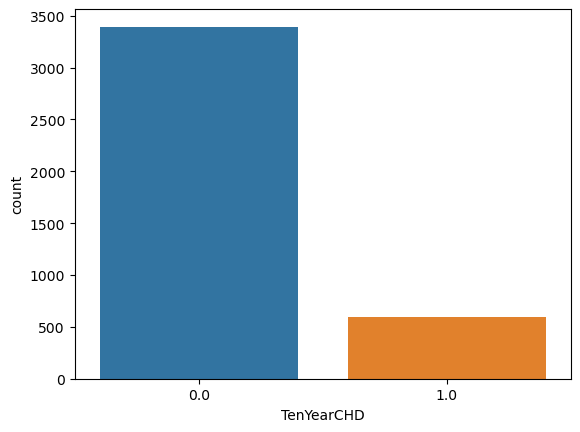

In [4]:
sns.countplot(df,x='TenYearCHD')

### Distribution of others variables.

Since some data is binary and some is continuous we need to show first the binary variables as countplots and then the continuous variables as histograms.

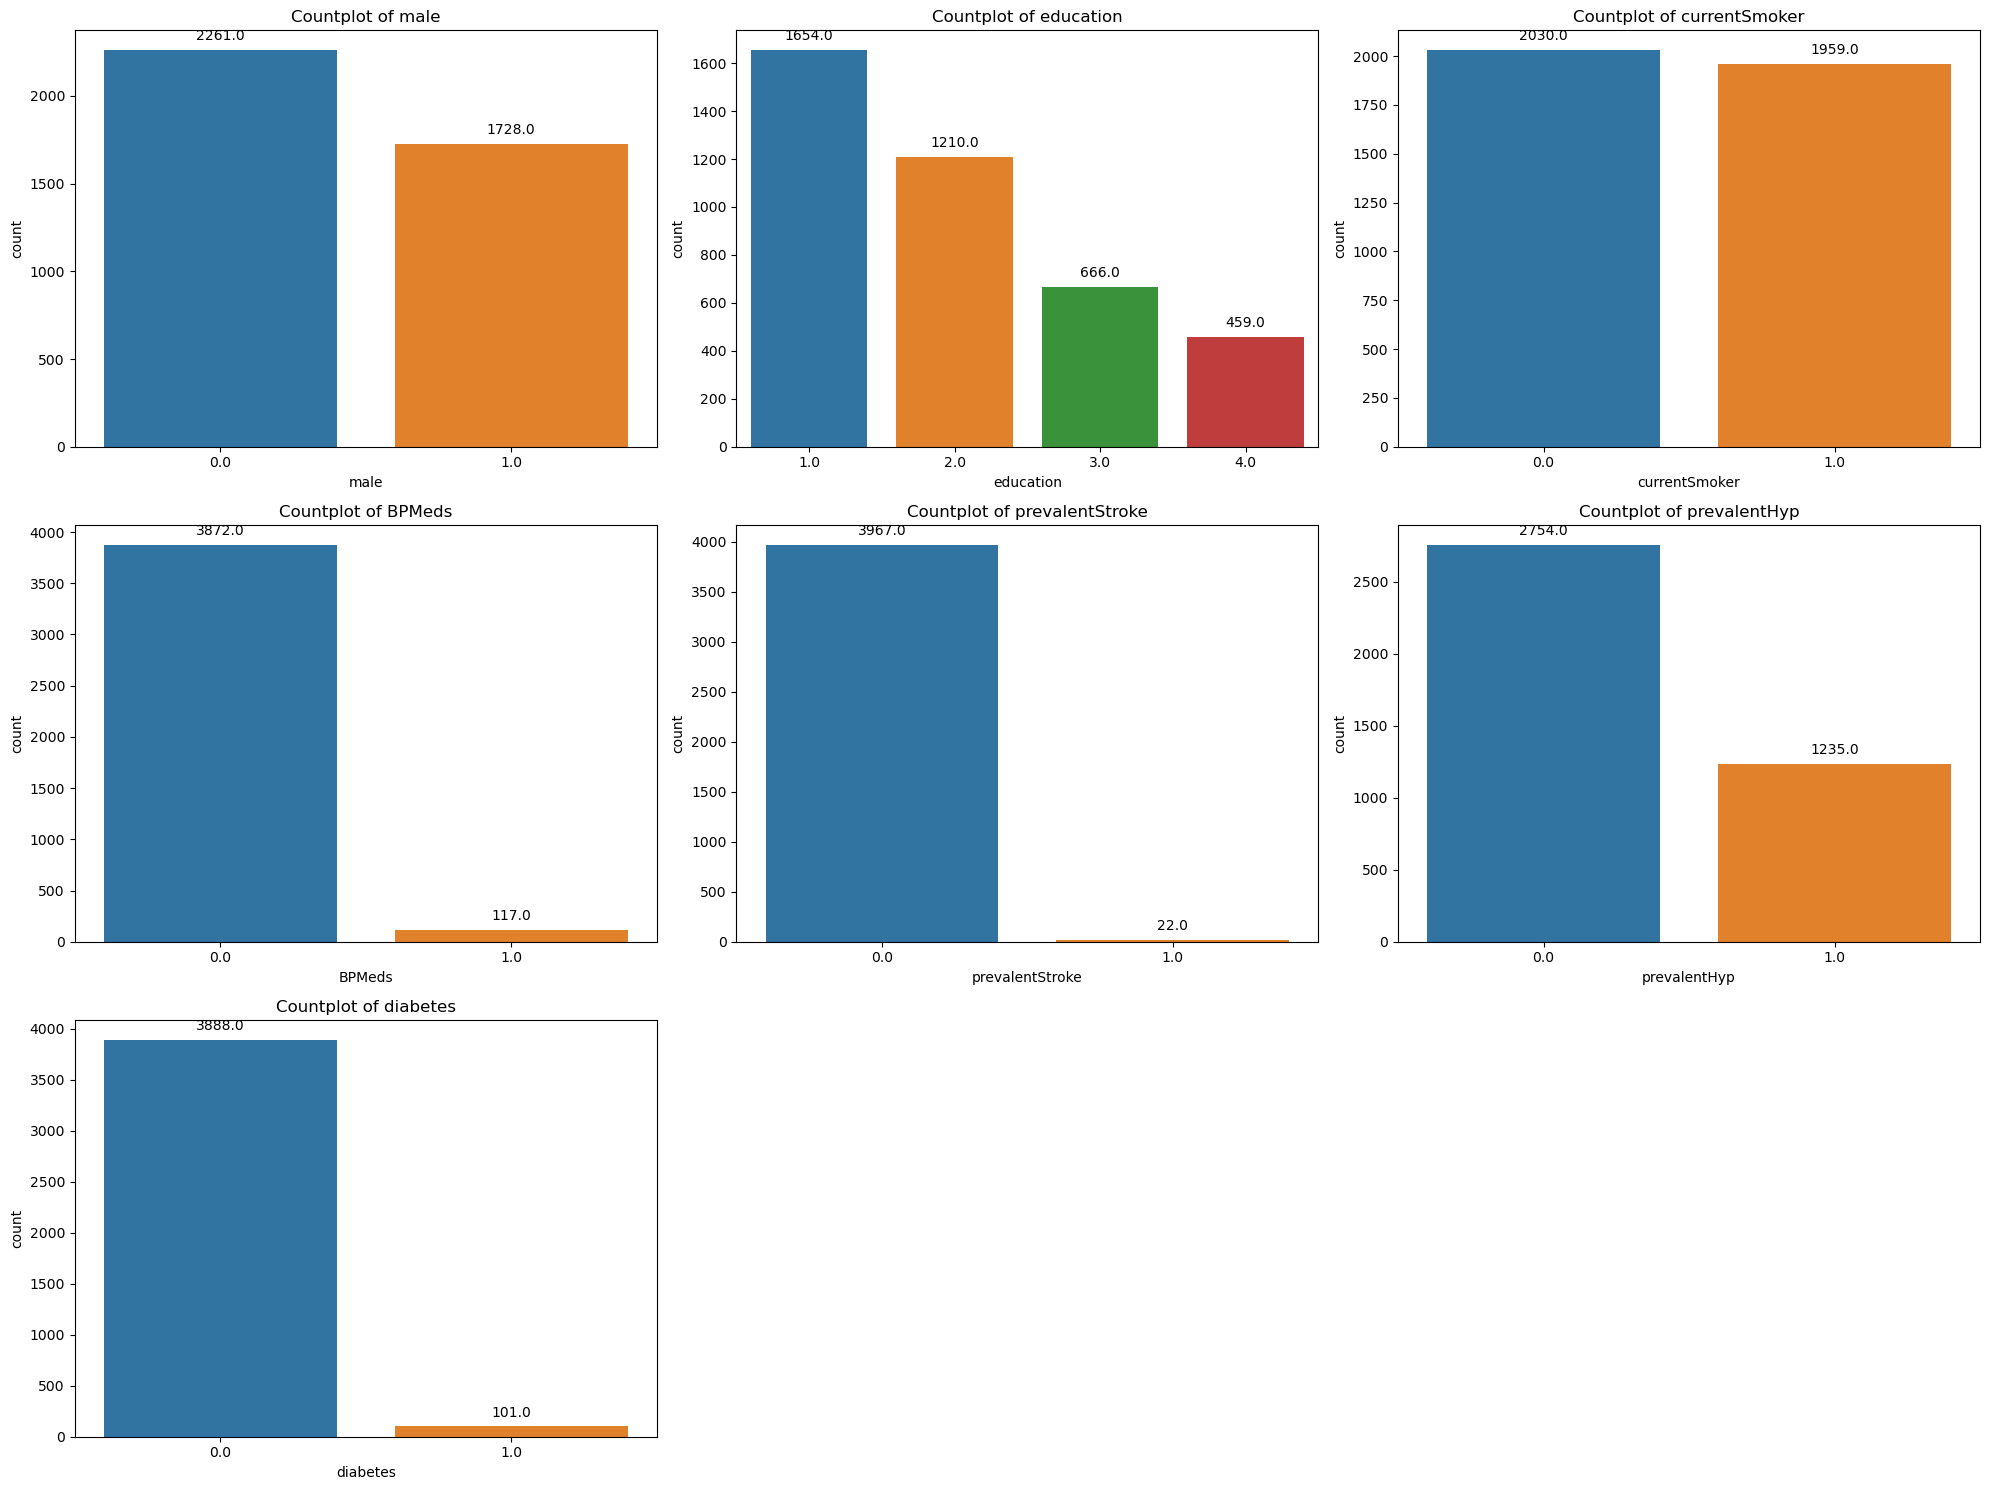

In [7]:
#Visualization of categorical variables
df2 = df.drop(columns=['age','totChol','sysBP','diaBP','BMI','heartRate','TenYearCHD','glucose','cigsPerDay'])

plt.figure(figsize=(20,15))

for i,col in enumerate(df2.columns,1):
    plt.subplot(3,3,i)
    
    unique_vals = sorted(df2[col].unique())
    
    ax = sns.countplot(x=col, data=df2, order=unique_vals)
    
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() /2., p.get_height()),
                    ha = 'center', va='center',
                    xytext=(0,10),
                    textcoords='offset points')
        plt.title(f'Countplot of {col}')
        plt.tight_layout()

plt.show()

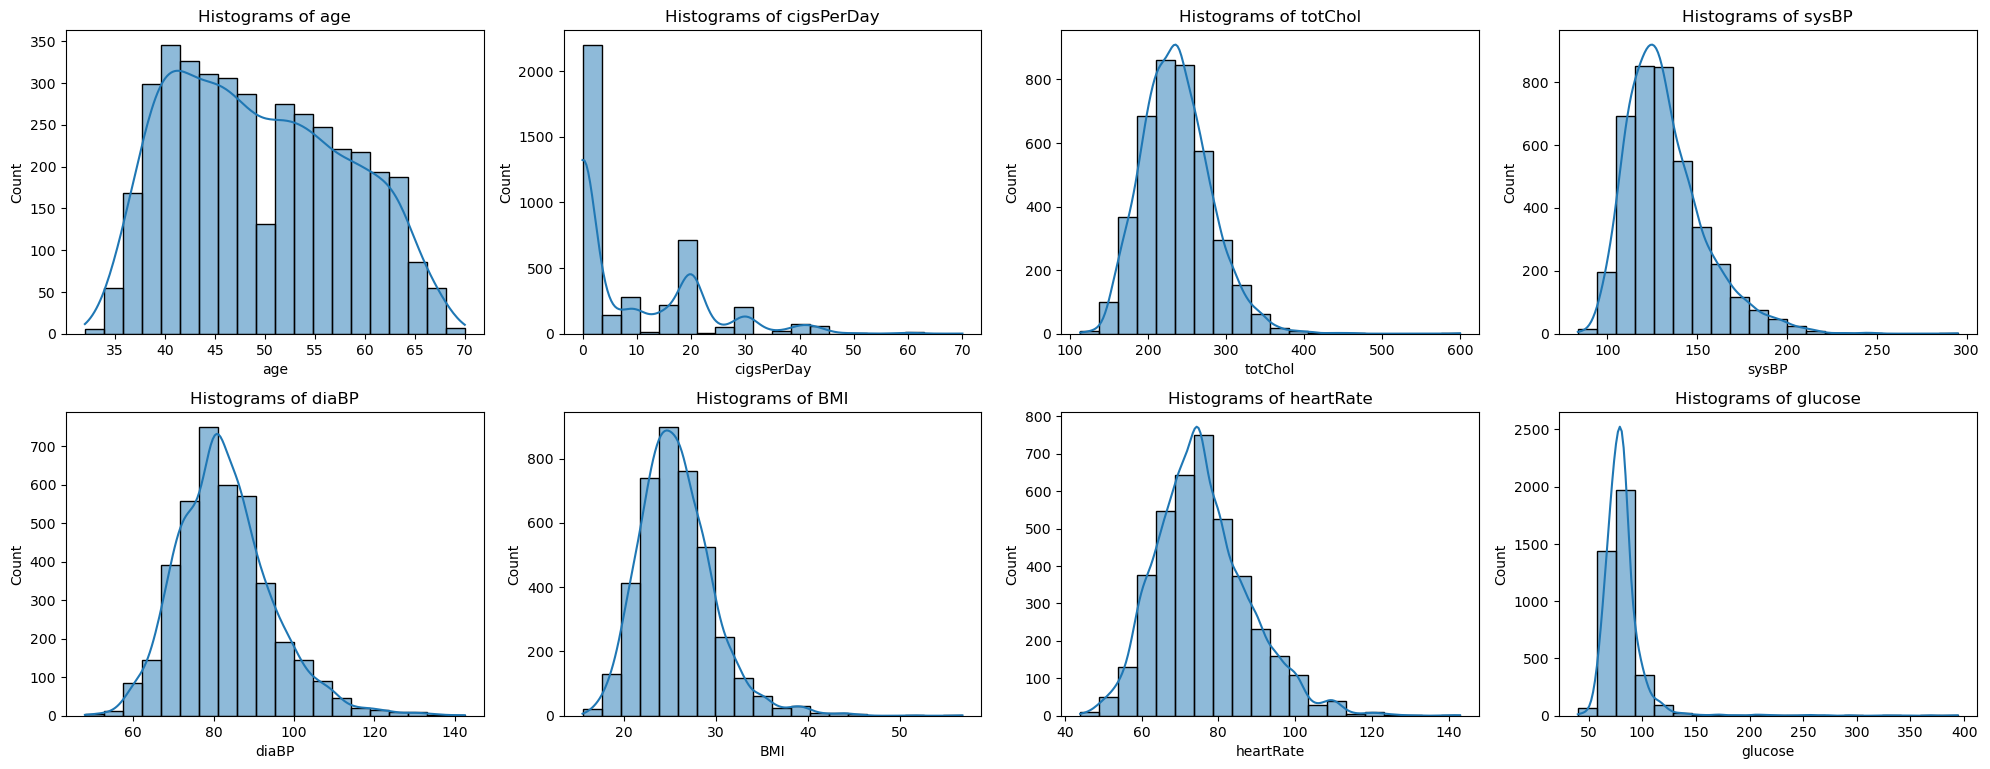

In [9]:
#Visualization of continuous variables.
df3 = df.drop(columns=['TenYearCHD','male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes'])

plt.figure(figsize=(20,15))
for i,col in enumerate(df3.columns,1):
    plt.subplot(4,4,i)
    sns.histplot(df3[col],kde=True,bins=20)
    plt.title(f'Histograms of {col}')
    plt.tight_layout()
    
plt.show()

## Correlation of variables

Text(0.5, 1.0, 'Correlation beetwen features')

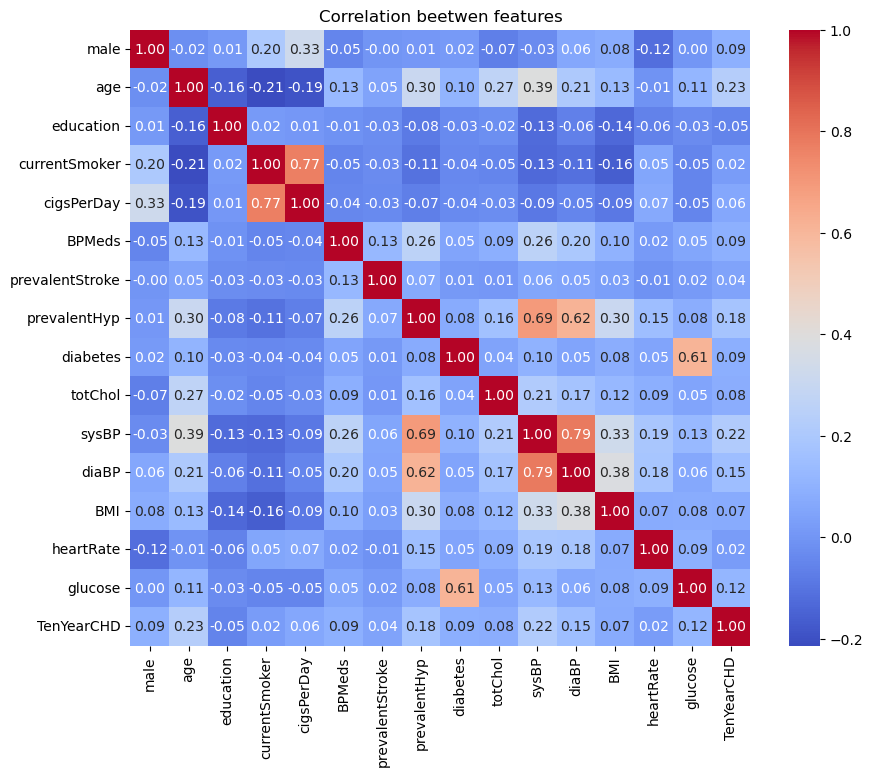

In [10]:
correlation = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation beetwen features')

It seems that age and SysBP are correlated so let's take a look on this.

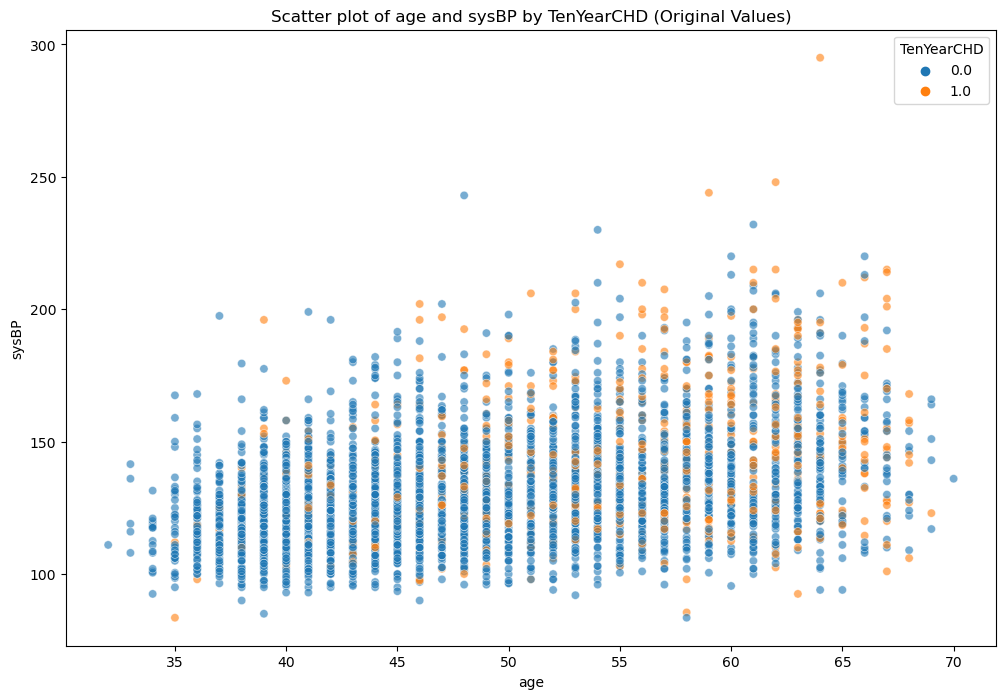

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='age',y='sysBP',hue='TenYearCHD',alpha=0.6)
plt.title('Scatter plot of age and sysBP by TenYearCHD (Original Values)')
plt.show()

It seems that the systolic preasure increases as age increases, also,in general the TenYearCHD positive individuals are distributed at higher systolic preasure levels. However there's a significant overlap between the two groups.

Now let's consider the relations beetween glucose levels, diabetes and the TenYearCHD variable.

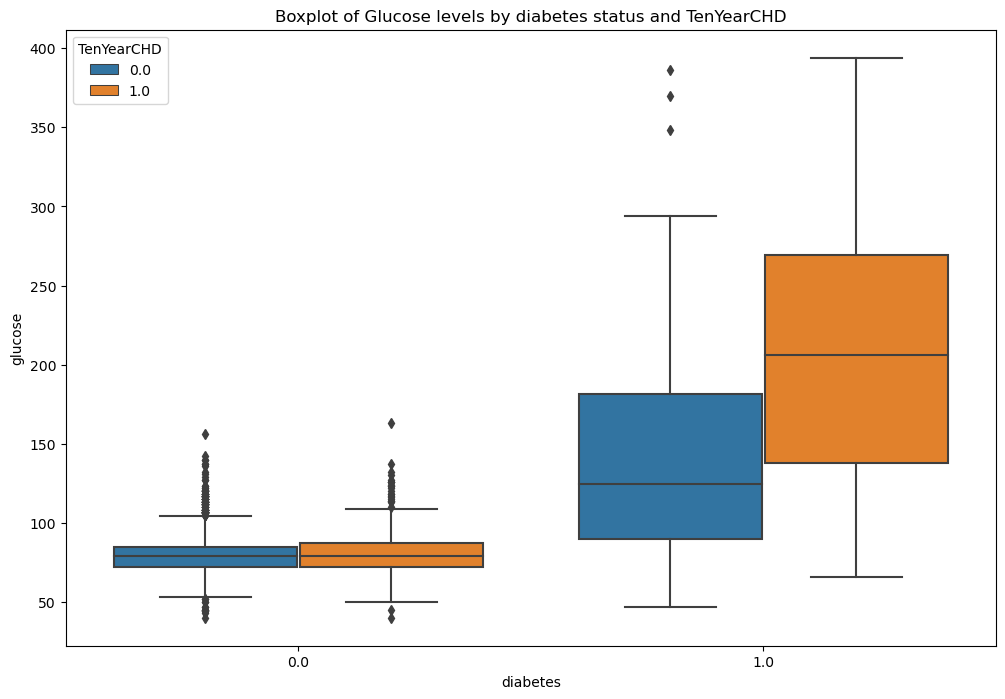

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x='diabetes',y='glucose',hue='TenYearCHD')
plt.title('Boxplot of Glucose levels by diabetes status and TenYearCHD')
plt.show()

As expected individuals with diabetes have greater glucose levels that individuals without diabetes, but most important observation, the individuals with diabetes have a higher incidence of coronary heart disease in ten years when they have a higher glucose level than those with diabetes and low glucose level.

Systolic and diastolic blood pressure are two important parameters for diagnosing heart disease. I'll create a new variable called "BP_mean" that will be the constant blood pressure value that, with the same peripheral resistance, would produce the same flow rate (cardiac minute volume) that generates the variable blood pressure.

In [ ]:
BP_mean = ((df['diaBP']*2)+df['sysBP'])/3

In order to analyse wether is more relevant BP_mean or the interactions between sysBP and diaBP, we will show those relations in a scatter plot.

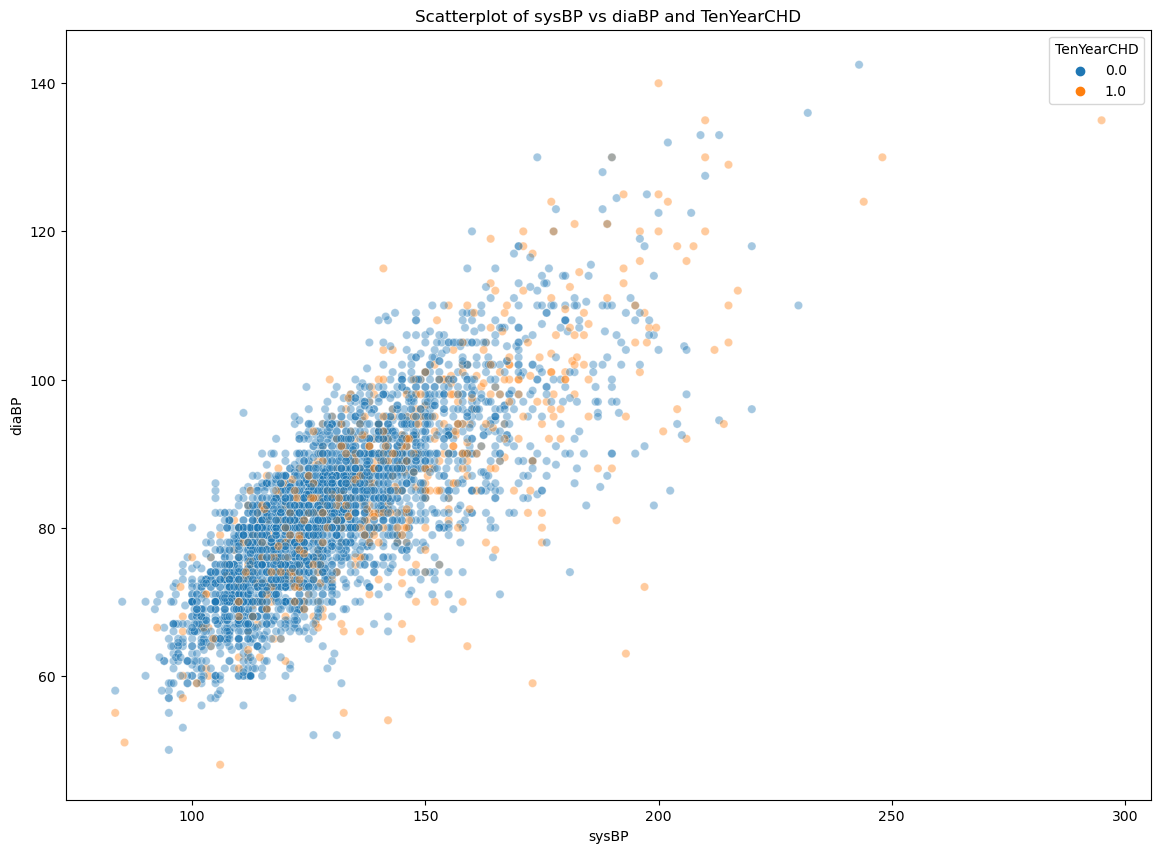

In [18]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=df,x='sysBP',y='diaBP',hue='TenYearCHD',alpha=0.4)
plt.title('Scatterplot of sysBP vs diaBP and TenYearCHD')
plt.show()

In [ ]:
plt.figure(figsize=(14,10))